In [21]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [22]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsorted
#if isinstance(ns, ModuleType):
#    natsort = ns.natsorted
#else:
#    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [25]:
#natsort.natsort()

## A

In [26]:
#rdir = '/workspace'
rdir = '../'

dat_filesA = natsorted(glob2.glob(rdir + 'results/A/**/*.dat'))

dat_filesB = natsorted(glob2.glob(rdir + 'results/B/**/*.dat'))
dat_filesC = natsorted(glob2.glob(rdir + 'results/C/**/*.dat'))
dat_filesD = natsorted(glob2.glob(rdir + 'results/D/**/*.dat'))


len(dat_filesB)


8

In [27]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [28]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']


In [35]:
dat_filesD[6]

'../results/D/7/results_modelD_7.dat'

In [32]:
dfA = pd.read_csv(dat_filesA[0], sep="\s*", header=None,  index_col=False)
dfA.columns = columns3

dfA['rmsSurfScaled'] = (dfA['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
dfA['realtimeScaled'] = (dfA['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

#

dfC = pd.read_csv(dat_filesB[2], sep="\s*", header=None,  index_col=False)
dfC.columns = columns3

dfC['rmsSurfScaled'] = (dfC['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
dfC['realtimeScaled'] = (dfC['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

#

dfB = pd.read_csv(dat_filesB[3], sep="\s*", header=None,  index_col=False)
dfB.columns = columns3

dfB['rmsSurfScaled'] = (dfB['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
dfB['realtimeScaled'] = (dfB['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)


#

dfD = pd.read_csv(dat_filesD[6], sep="\s*", header=None,  index_col=False)
dfD.columns = columns3

dfD['rmsSurfScaled'] = (dfD['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
dfD['realtimeScaled'] = (dfD['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:

(0, 20)

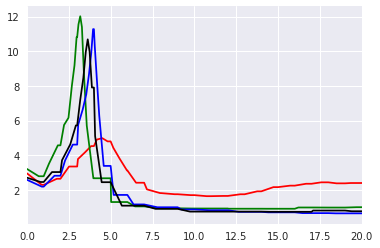

In [34]:
fig, ax = plt.subplots()

ax.plot(dfA['realtimeScaled'] , (dfA['rmsSurf']/dfA['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='r' )


ax.plot(dfB['realtimeScaled'] , (dfB['rmsSurf']/dfB['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='g' )

ax.plot(dfC['realtimeScaled'] , (dfC['rmsSurf']/dfC['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='b' )

ax.plot(dfD['realtimeScaled'] , (dfD['rmsSurf']/dfD['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='k' )



ax.set_xlim(0, 20)

In [12]:
#np.argmax(dfC['rmsSurf'])


In [13]:
import h5py

In [14]:
with h5py.File('../results/velxSurface_262.h5','r') as hf:
    data = hf.get('data')
    np_data = np.array(data)

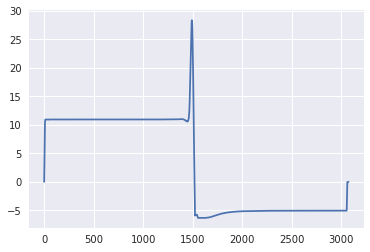

In [15]:
plt.plot((np_data/(2900.*1e3/1e-6)*(1e2*3600*24*365)))